In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

# 1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

In [75]:
data = pd.read_csv('titanic-passengers.csv',encoding="ISO-8859-1",sep =";")

In [76]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [77]:
data.shape

(891, 12)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [79]:
 data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
data = data.drop(columns='Cabin', axis=1)

In [81]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data["Embarked"].fillna('S', inplace=True)

In [82]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [83]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
data['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [85]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<AxesSubplot:>

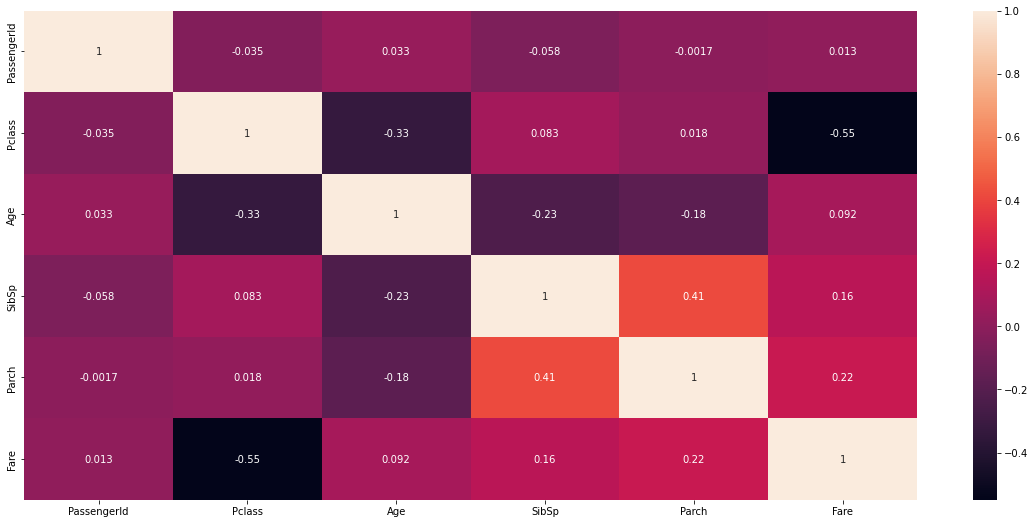

In [86]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(),annot=True)

C:\Users\Le Mlk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

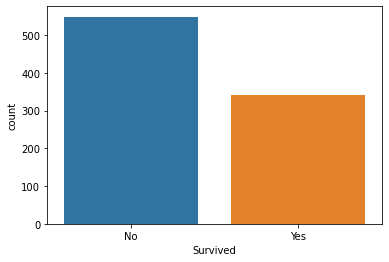

In [10]:
sns.countplot('Survived', data=data)

C:\Users\Le Mlk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

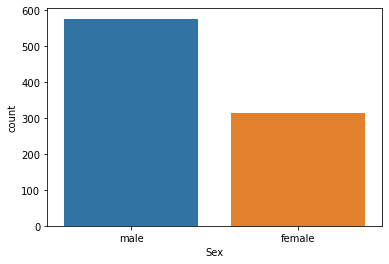

In [11]:
sns.countplot('Sex', data=data)

C:\Users\Le Mlk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

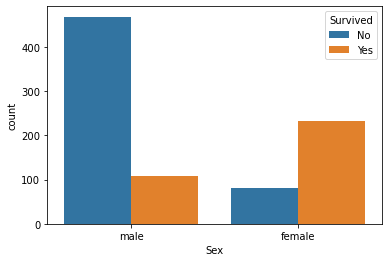

In [15]:
sns.countplot('Sex', hue='Survived', data=data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

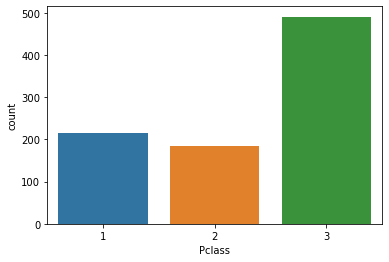

In [16]:
sns.countplot('Pclass', data=data)

C:\Users\Le Mlk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

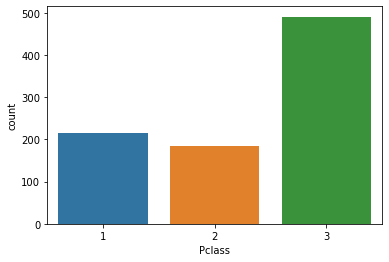

In [120]:
sns.countplot('Pclass', x='Survived', data=data)

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].map({'C':0, 'Q':1, 'S':2})
data['Survived'] = data['Survived'].map({'Yes':0, 'No':1})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,1,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,2
1,76,1,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,2
2,641,1,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,2
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,2
4,672,1,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,2


In [89]:
data.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [90]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,0,28.0,0,0,13.0000,2
1,1,3,0,25.0,0,0,7.6500,2
2,1,3,0,20.0,0,0,7.8542,2
3,1,3,1,29.0,0,4,21.0750,2
4,1,1,0,31.0,1,0,52.0000,2


# separating features and target

In [91]:
x = data[['Pclass','Sex','Embarked','Age','Fare']]
y = data['Survived']

In [92]:
print(x)

     Pclass  Sex  Embarked        Age     Fare
0         2    0         2  28.000000  13.0000
1         3    0         2  25.000000   7.6500
2         3    0         2  20.000000   7.8542
3         3    1         2  29.000000  21.0750
4         1    0         2  31.000000  52.0000
..      ...  ...       ...        ...      ...
886       2    1         0  14.000000  30.0708
887       3    0         0  22.000000   7.2292
888       3    1         2  30.000000   8.6625
889       3    0         2  29.699118   7.8958
890       2    1         2  19.000000  26.0000

[891 rows x 5 columns]


In [93]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
886    0
887    1
888    1
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# splitting the data into training data and testing data

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [97]:
print(x.shape, x_train.shape, x_test.shape, y_train.shape)

(891, 5) (712, 5) (179, 5) (712,)


# model training

In [98]:
tree_model=DecisionTreeClassifier() 

In [101]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [102]:
tree_model.score(x_train, y_train)

0.9803370786516854

In [103]:
tree_model.score(x_test, y_test)

0.7988826815642458

# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

In [104]:
arbreFirst = DecisionTreeClassifier(criterion='gini', splitter='random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5) 

In [105]:
arbreFirst.fit(x_train, y_train)
y_pred=arbreFirst.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7932960893854749


[Text(0.36363636363636365, 0.9166666666666666, 'Pclass <= 0.223\ngini = 0.469\nsamples = 712\nvalue = [268, 444]'),
 Text(0.18181818181818182, 0.75, 'Survived <= 1.33\ngini = 0.296\nsamples = 460\nvalue = [83, 377]'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.461\nsamples = 100\nvalue = [36, 64]'),
 Text(0.2727272727272727, 0.5833333333333334, 'Sex <= 0.329\ngini = 0.227\nsamples = 360\nvalue = [47, 313]'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.349\nsamples = 40\nvalue = [9, 31]'),
 Text(0.36363636363636365, 0.4166666666666667, 'Age <= 37.752\ngini = 0.209\nsamples = 320\nvalue = [38, 282]'),
 Text(0.2727272727272727, 0.25, 'Age <= 15.111\ngini = 0.225\nsamples = 263\nvalue = [34, 229]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.48\nsamples = 25\nvalue = [10, 15]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.181\nsamples = 238\nvalue = [24, 214]'),
 Text(0.45454545454545453, 0.25, 'gini = 0.131\nsamples = 57\nvalue = [4,

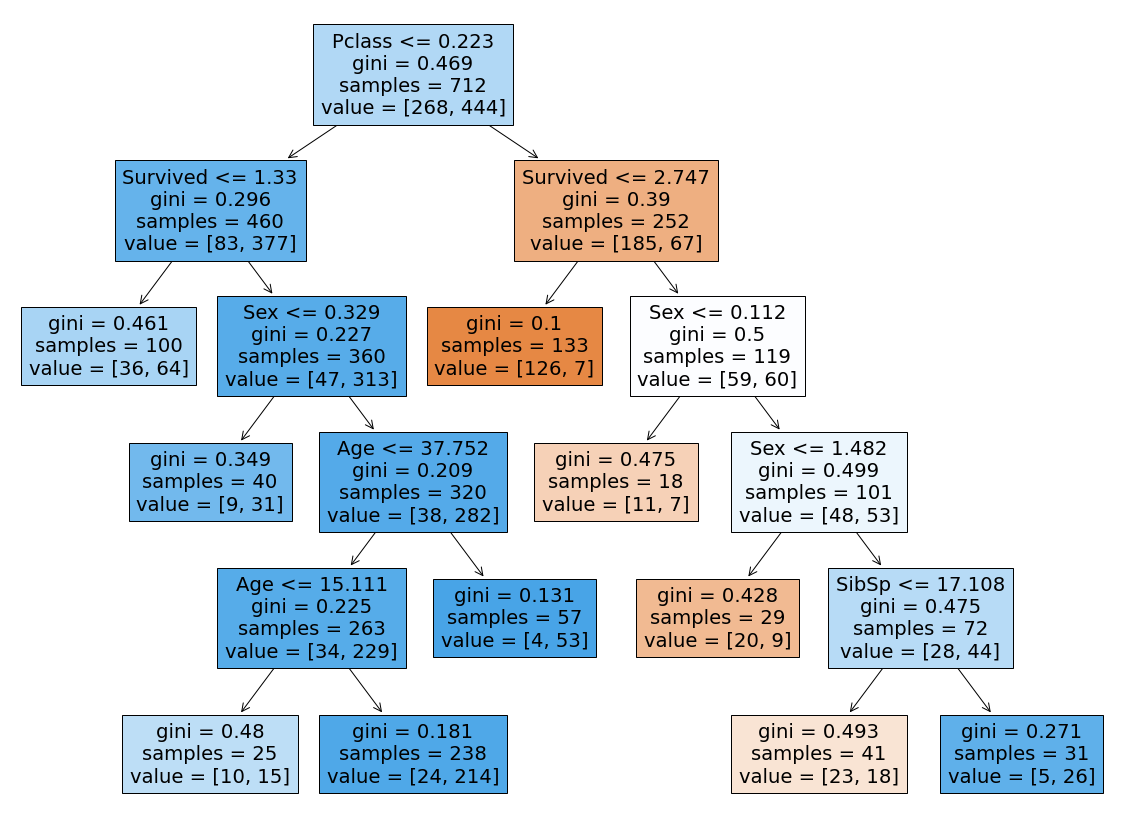

In [106]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(arbreFirst,feature_names = list(data.columns[:-1]),filled=True)

# Change the decision tree parameters(change at least two parameters)

In [107]:
arbreFirst = DecisionTreeClassifier(criterion='gini', splitter='random', max_leaf_nodes=12, min_samples_leaf=20, max_depth=10) 

In [108]:
arbreFirst.fit(x_train, y_train)
y_pred=arbreFirst.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


[Text(0.47368421052631576, 0.9166666666666666, 'Pclass <= 0.011\ngini = 0.469\nsamples = 712\nvalue = [268, 444]'),
 Text(0.2631578947368421, 0.75, 'Survived <= 2.171\ngini = 0.296\nsamples = 460\nvalue = [83, 377]'),
 Text(0.15789473684210525, 0.5833333333333334, 'Survived <= 1.156\ngini = 0.37\nsamples = 184\nvalue = [45, 139]'),
 Text(0.10526315789473684, 0.4166666666666667, 'Sex <= 0.493\ngini = 0.461\nsamples = 100\nvalue = [36, 64]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.48\nsamples = 35\nvalue = [14, 21]'),
 Text(0.15789473684210525, 0.25, 'Age <= 35.11\ngini = 0.448\nsamples = 65\nvalue = [22, 43]'),
 Text(0.10526315789473684, 0.08333333333333333, 'gini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.21052631578947367, 0.08333333333333333, 'gini = 0.382\nsamples = 35\nvalue = [9, 26]'),
 Text(0.21052631578947367, 0.4166666666666667, 'gini = 0.191\nsamples = 84\nvalue = [9, 75]'),
 Text(0.3684210526315789, 0.5833333333333334, 'Sex <= 0.735\ngini = 0.237\nsamples = 276\n

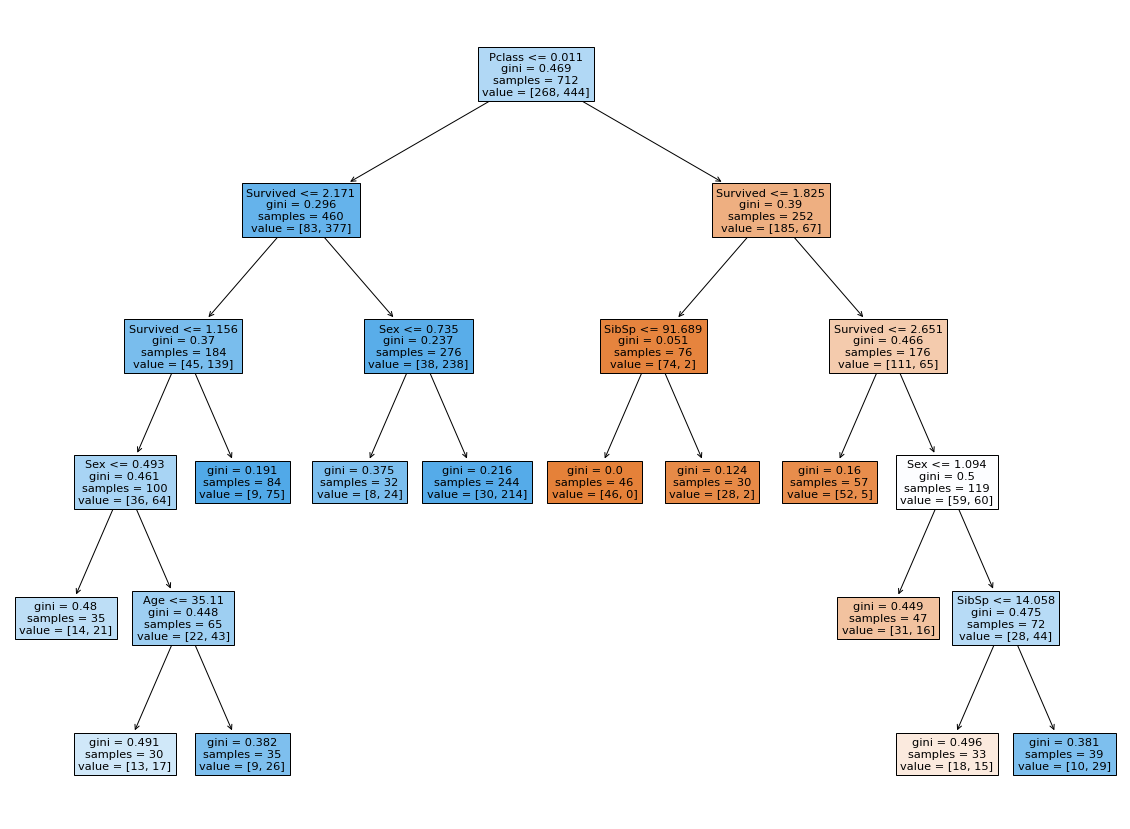

In [109]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(arbreFirst,feature_names = list(data.columns[:-1]),filled=True)

# 4. Calculate the new accuracy and compare it with the previous results

Après analyse je constate que pour la performance du premier Arbre est de 79% avec paramètres max_leaf_nodes=10, min_samples_leaf=5, max_depth=5 et pour le deuxième arbre lorsqu'on change les paramètres max_leaf_nodes=12, min_samples_leaf=20, max_depth=10 on obtient une perfomance de 78% disons une baisse de 1% sur le premier.

# 5. Use random forest then change the number of estimators

In [110]:
x = data[['Pclass','Sex','Embarked','Age','Fare']]
y = data['Survived']

In [111]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=10)

In [118]:
clf=RandomForestClassifier(n_estimators=12)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8044692737430168


#  Calculate the new accuracy and compare it with the previous result.


In [119]:
clf=RandomForestClassifier(n_estimators=15)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8156424581005587


Après analyse je constate lorsqu'on utilise random forest sur notre dataset et qu'on lui donne un nombre n_estimators=12 on obtient une perfomance de 80% et pour le deuxième qu'on lui donne un nombre n_estimators=15 on obtinet une perfomance de 81% disons une baisse de 1%